In [1]:
import numpy as np
import matplotlib as mtlp
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from matplotlib import rc
from pyik.mplext import plot_hist, uncertainty_ellipse
from scipy.stats import chi2
import yaml
import matplotlib.patches as mpl_patches
import mplhep as hep
rc('text', usetex=True)
import sys
sys.path.append('../HelpherFunctions/')
from Chi2 import *
######
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
plt.rcParams['font.family'] = 'serf'
filename ="../results/data.yaml"
########
stream = open(filename, 'r')#
data = yaml.safe_load(stream)
########
from iminuit import Minuit
import tabulate as tab
####
CF= 4/3
Nc=3
####
# fit function, takes the chi 2 function with selected channels via switches
def fit(func):
    m = Minuit(func,xcqu=0,xch=0)
    m.errordef= Minuit.LEAST_SQUARES
    m.migrad()
    cqu1_0, ch_0=m.values
    fmin =func(cqu1_0,ch_0)
    print(m.values)
    print(m.errors)
    print(m.params)
    print(tab.tabulate(*m.covariance.correlation().to_table()))
    #print(m.matrix(correlation=True))
    return fmin


In [5]:
oplabel={
'Cqt8':'C_{Qt}^{(8)}',
'Cqt1':'C_{Qt}^{(1)}',
'Cqtqb1':'C_{QtQb}^{(1)}',
'Cqtqb8':'C_{QtQb}^{(8)}',
'Ctt1':'C_{tt}^{(1)}',
'Cqq1':'C_{QQ}^{(1)}',
'Cqq8':'C_{QQ}^{(8)}',
}
operator='Cqtqb8'
CC2=1
linearl3 = True
linearmu = True 
top=0


chi2_fit_resl3 = lambda xcqu,xch : -2.*mylikelihood('Cqtqb8',xcqu,xch,data,experiments=['HL-LHC'],HiggsChannels=['ggf','vbf','ttxh','vh','zh','wh'],TopChannels=None,linearl3=False,linearmu=True)
chi2_fit_linel3 = lambda xcqu,xch : -2.*mylikelihood('Cqtqb8',xcqu,xch,data,experiments=['HL-LHC'],HiggsChannels=['ggf','vbf','ttxh','vh','zh','wh'],TopChannels=None,linearl3=True,linearmu=True)


In [6]:
fminres= fit(chi2_fit_resl3)  #resummed trilinear 

E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
<ValueView xcqu=-75.93098308725851 xch=0.0>
<ErrorView xcqu=0.0 xch=0.0>
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xcqu │ -7.5931e1 │ 0.0000e1  │            │            │         │         │       │
│ 1 │ xch  │     0     │     0     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘


AttributeError: 'NoneType' object has no attribute 'correlation'

In [4]:
fminline = fit(chi2_fit_linel3)

E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
<ValueView xcqu=-71.04981150901885 xch=0.0>
<ErrorView xcqu=0.0 xch=0.0>
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xcqu │ -7.105e1  │  0.000e1  │            │            │         │         │       │
│ 1 │ xch  │     0     │     0     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘


AttributeError: 'NoneType' object has no attribute 'correlation'

In [29]:
Cqu1 = np.linspace(-5.0,5.,30)
Ch =np.linspace(-100,200,30)
cqu1,ch =np.meshgrid(Cqu1,Ch)
VecChi2_linel3 = np.vectorize(chi2_fit_linel3, otypes=[np.ndarray])
VecChi2_resl3 = np.vectorize(chi2_fit_resl3, otypes=[np.ndarray])

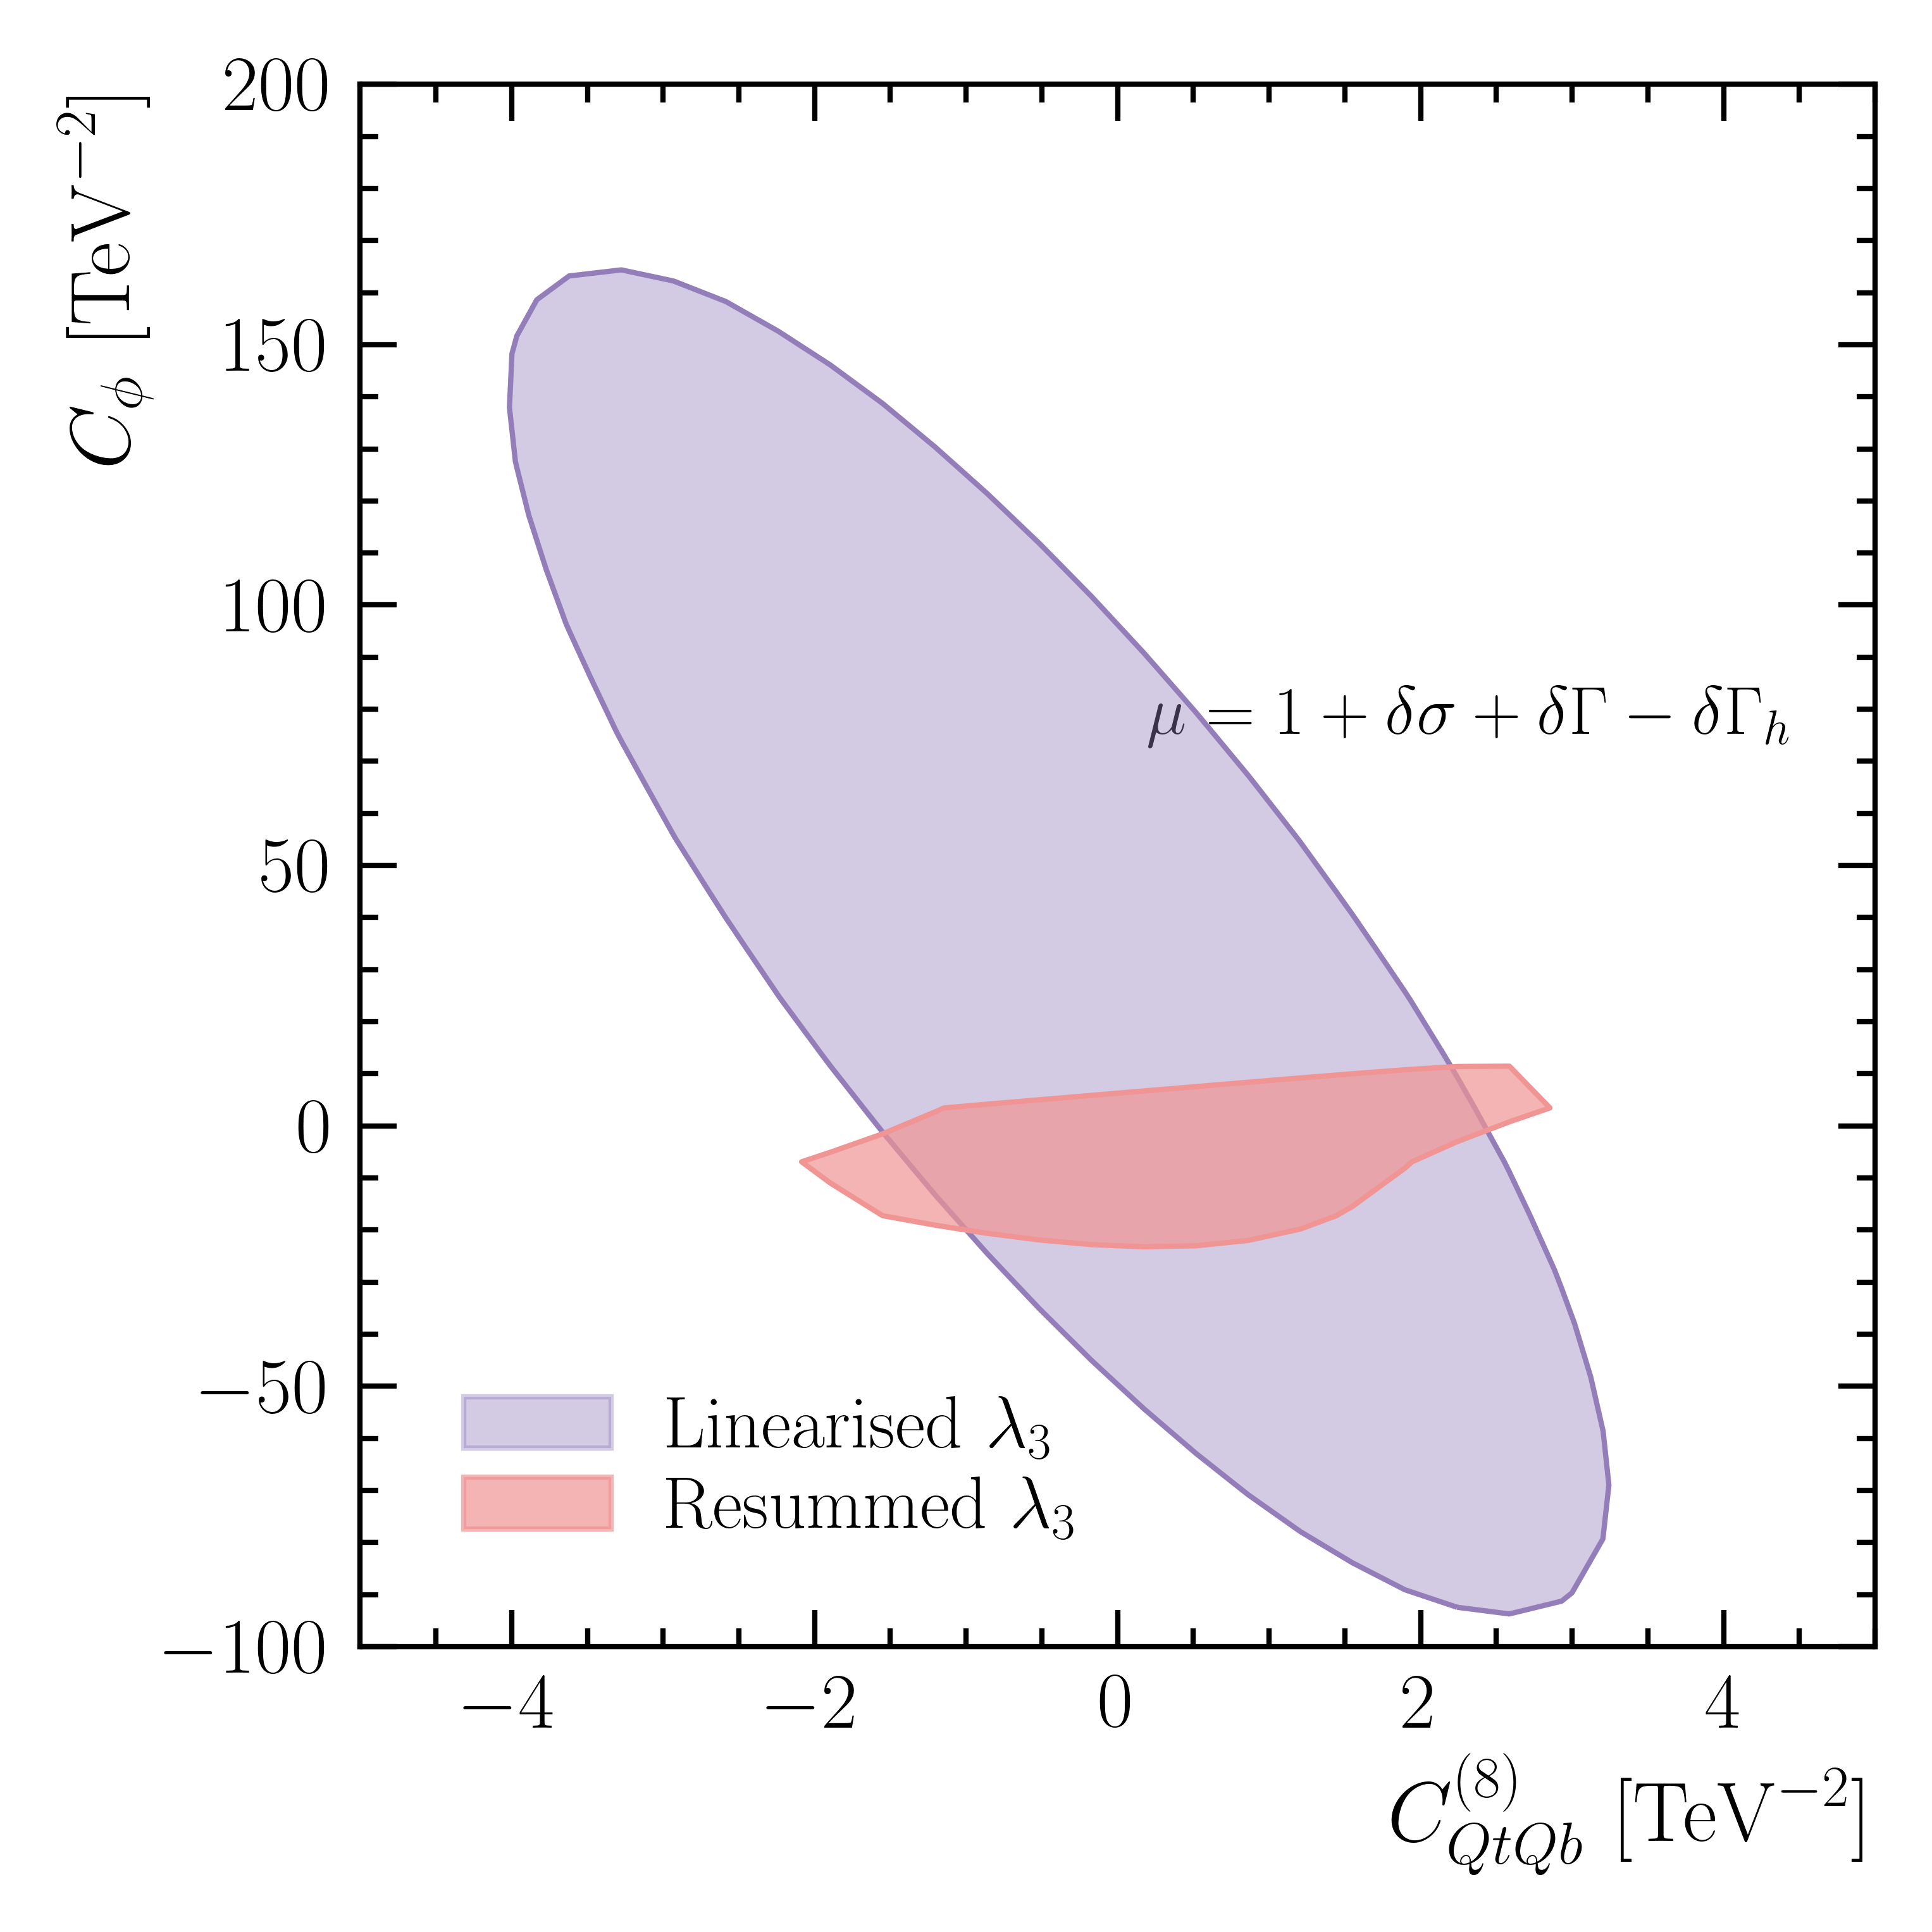

In [30]:
colpastil = ['#f4ecec','#937eba','#72bbd0','#f09494','#91f0a1']
plt.style.use(hep.style.LHCb2)
fig, ax = plt.subplots(1, figsize=(10, 10))
handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white",lw=0, alpha=0),]
ax.set_prop_cycle(color=colpastil)
##
plt.contour(cqu1,ch,VecChi2_linel3(cqu1,ch)
-fminline,[0,5.99],extend='min',zorder= 4,colors=colpastil[1],alpha=1,linewidths=2)
plt.contourf(cqu1,ch,VecChi2_linel3(cqu1,ch)
-fminline,[0,5.99],extend='min',zorder= 4,colors=colpastil[1],alpha=0.4)
plt.fill_between([1000,1001],[1000,1001],[1003,1002],color=colpastil[1],alpha=0.4,label=r"Linearised $\lambda_3$")

#######

plt.contour(cqu1,ch,VecChi2_resl3(cqu1,ch)
-fminres,[0,5.99],extend='min',zorder= 4,colors=colpastil[3],alpha=1,linewidths=2)
plt.contourf(cqu1,ch,VecChi2_resl3(cqu1,ch)
-fminres,[0,5.99],extend='min',zorder= 4,colors=colpastil[3],alpha=0.7)
plt.fill_between([1000,1001],[1000,1001],[1003,1002],color=colpastil[3],alpha=0.7,label=r"Resummed $\lambda_3$")

plt.xlim(Cqu1[0],Cqu1[-1])
plt.ylim(Ch[0],Ch[-1])
plt.xlabel(r"$%s \,\,[\mathrm{TeV}^{-2}]$"%(oplabel[operator]))
plt.ylabel(r"$C_\phi\,\,[\mathrm{TeV}^{-2}]$ ") #

ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
# ax.legend(handles,lggh, labels, loc='best',
#           fancybox=False, framealpha=0.0,
#           handlelength=0, handletextpad=0)
ax.legend(loc=3)
plt.text(.2,75,r"$\mu=1+\delta \sigma+\delta\Gamma-\delta \Gamma_h$",fontsize=26)
#plt.text(15.,75,r"$\mu=(1+\delta \sigma)(\frac{1+\delta\Gamma}{1+\delta \Gamma_h})$")
plt.gcf().tight_layout()
#fig.savefig('everything_linearisation_cqt.pdf', dpi=300)
plt.show()

In [58]:
 chi2_fit_nl_resl3 = lambda xcqu,xch  : -1*mylikelihood('Cqtqb8',xcqu,xch,data,experiments=['CMS','ATLAS'],HiggsChannels=['ggf','vbf','ttxh','vh','zh','wh'],TopChannels=None,linearl3=False,linearmu=False)
chi2_fit_nl_linel3 =  lambda xcqu,xch  : -1*mylikelihood('Cqtqb8',xcqu,xch,data,experiments=['CMS','ATLAS'],HiggsChannels=['ggf','vbf','ttxh','vh','zh','wh'],TopChannels=None,linearl3=True,linearmu=False)

In [59]:
fmin_nl_res= fit(chi2_fit_nl_resl3) 

<ValueView xcqu=0.592207907375494 xch=10.32855653832414>
<ErrorView xcqu=1.4429527261213804 xch=4.922602233241122>
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xcqu │    0.6    │    1.4    │            │            │         │         │       │
│ 1 │ xch  │    10     │     5     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
        xcqu    xch
----  ------  -----
xcqu   1      0.837
xch    0.837  1


In [60]:
fmin_nl_l= fit(chi2_fit_nl_linel3) 

<ValueView xcqu=-2.5224115462549688 xch=36.55788672077049>
<ErrorView xcqu=1.7687921489360259 xch=55.560143150776206>
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xcqu │   -2.5    │    1.8    │            │            │         │         │       │
│ 1 │ xch  │    40     │    60     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
        xcqu     xch
----  ------  ------
xcqu   1      -0.832
xch   -0.832   1


In [8]:
VecChi2_linel3_nl = np.vectorize(chi2_fit_nl_linel3, otypes=[np.ndarray])
VecChi2_resl3_nl = np.vectorize(chi2_fit_nl_resl3, otypes=[np.ndarray])
Cqu1 = np.linspace(-26.0,26.0,120)
Ch =np.linspace(-70,200,120)
cqu1,ch =np.meshgrid(Cqu1,Ch)

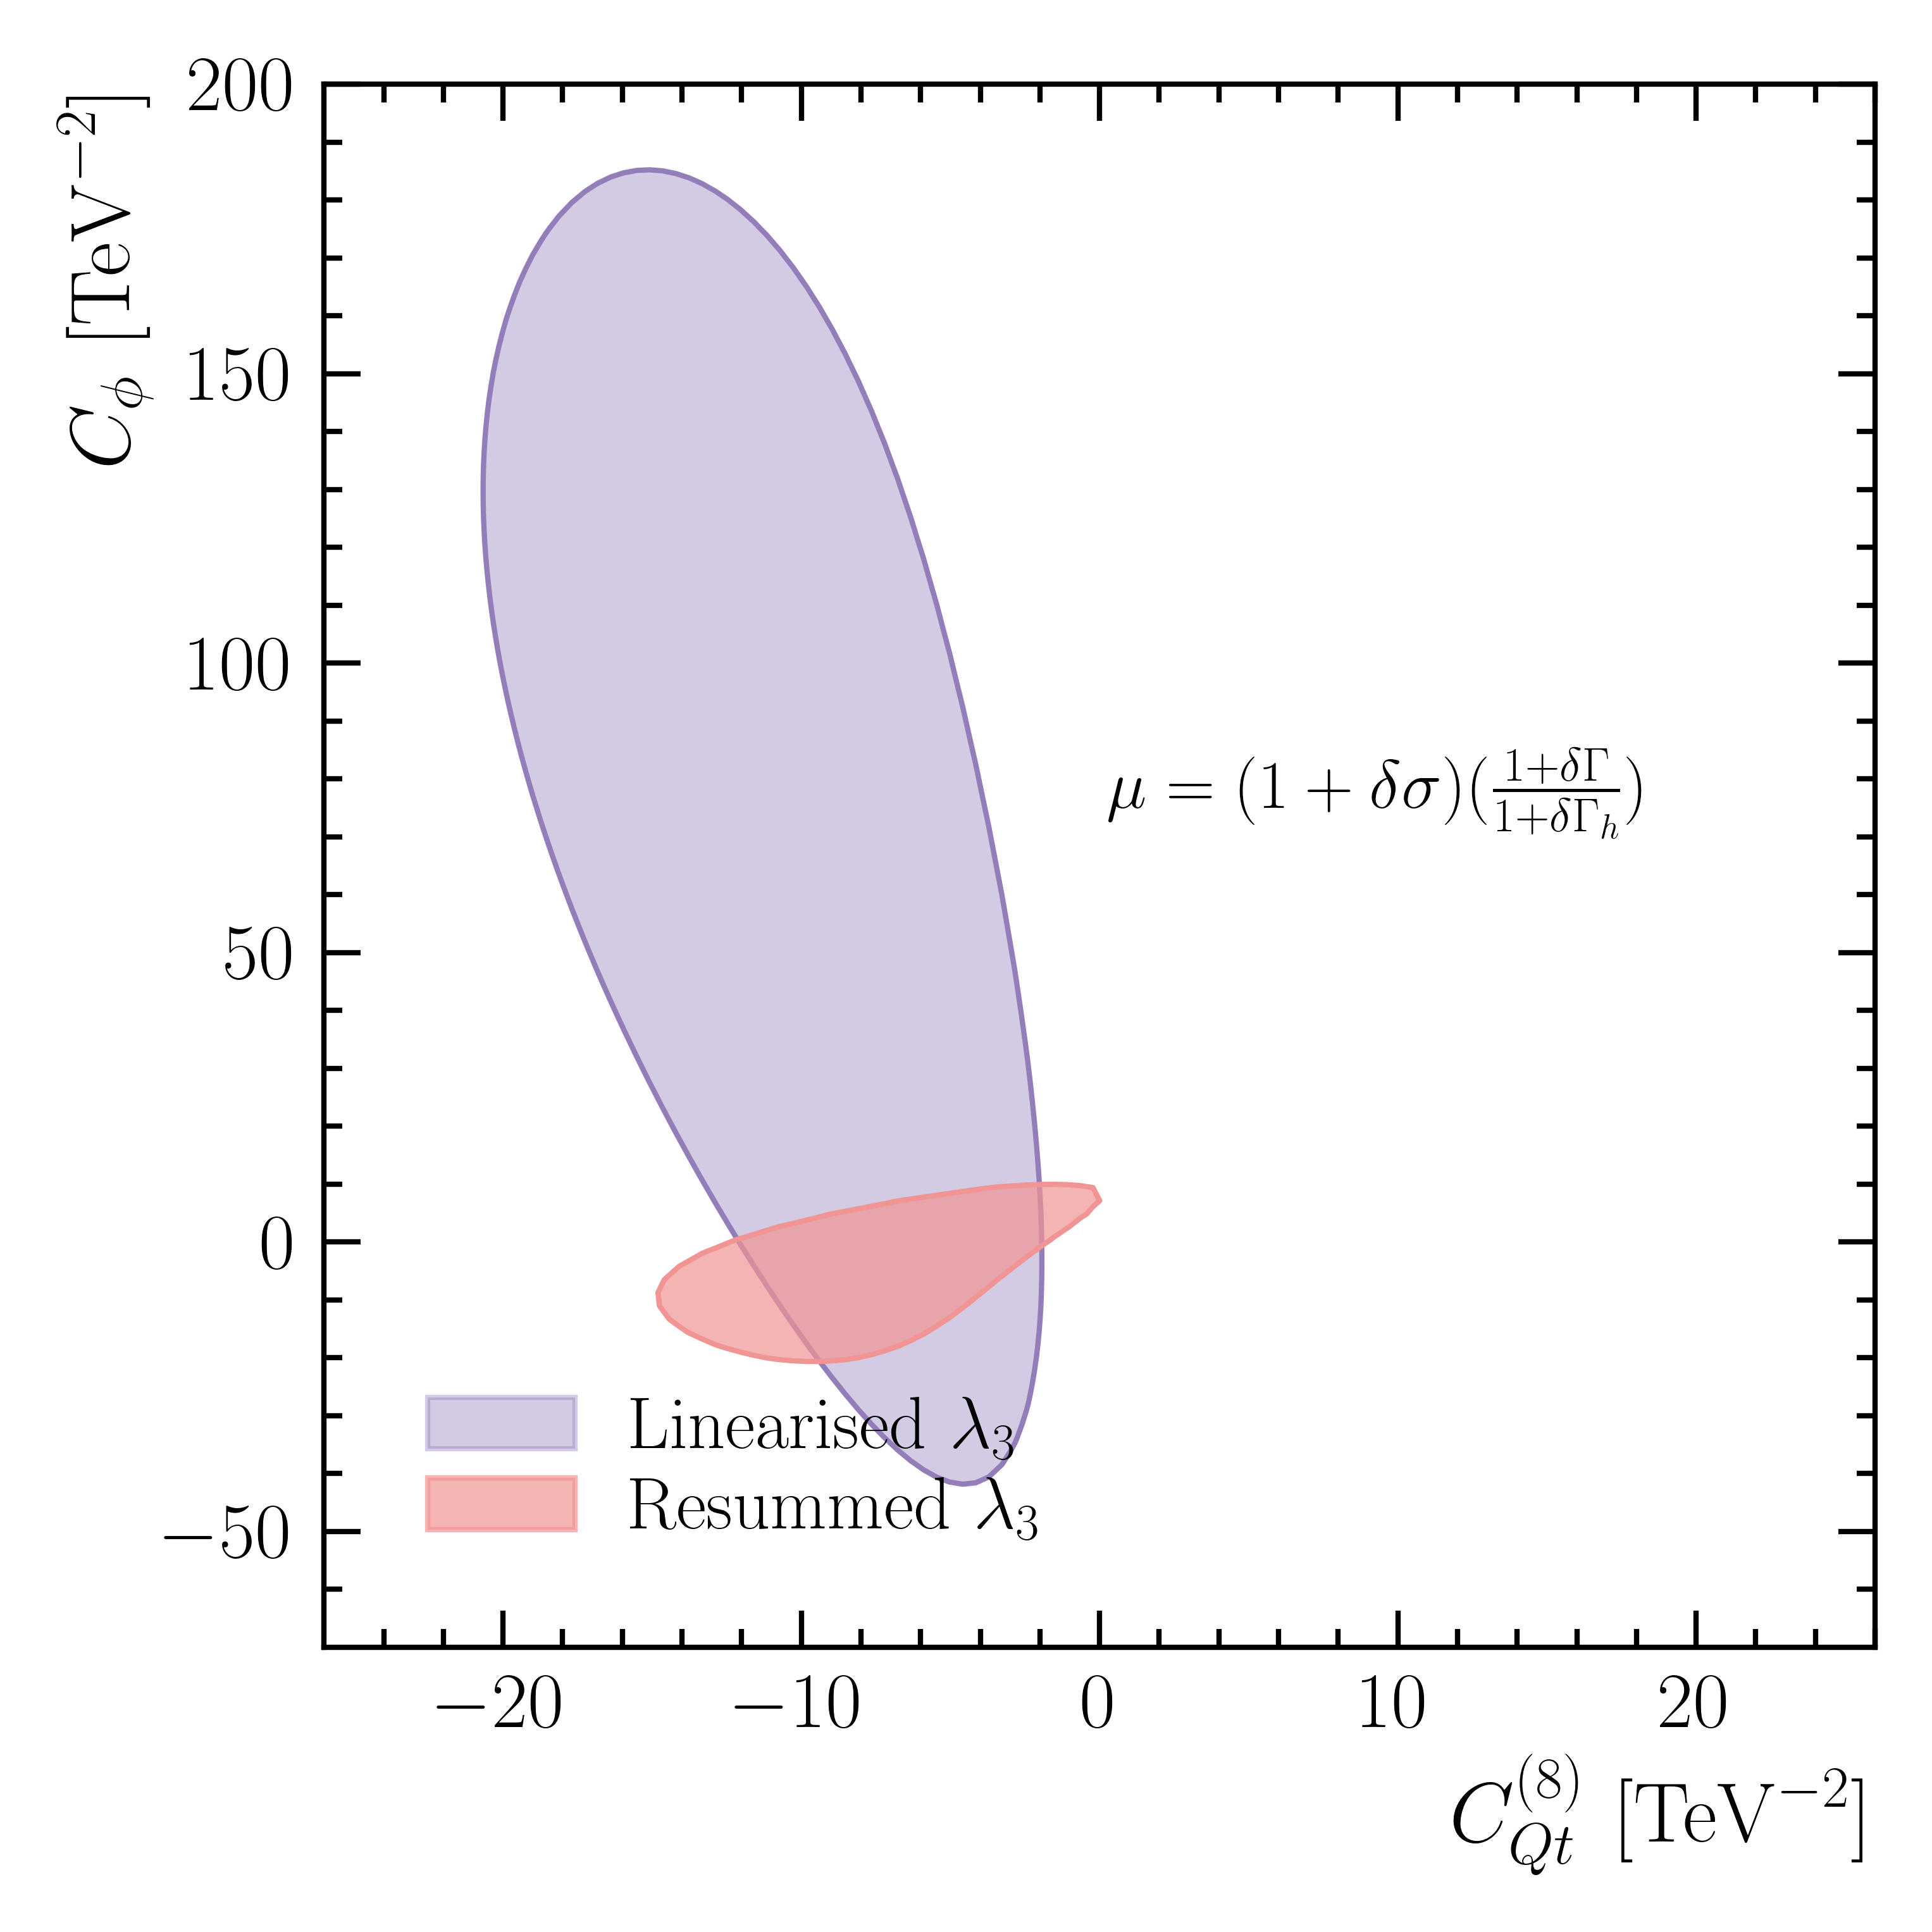

In [9]:
colpastil = ['#f4ecec','#937eba','#72bbd0','#f09494','#91f0a1']
plt.style.use(hep.style.LHCb2)
fig, ax = plt.subplots(1, figsize=(10, 10))
handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white",lw=0, alpha=0),]
ax.set_prop_cycle(color=colpastil)
##
plt.contour(cqu1,ch,VecChi2_linel3_nl(cqu1,ch)-fmin_nl_l,[0,5.99],extend='min',zorder= 4,colors=colpastil[1],alpha=1,linewidths=2)
plt.contourf(cqu1,ch,VecChi2_linel3_nl(cqu1,ch)-fmin_nl_l,[0,5.99],extend='min',zorder= 4,colors=colpastil[1],alpha=0.4)
plt.fill_between([1000,1001],[1000,1001],[1003,1002],color=colpastil[1],alpha=0.4,label=r"Linearised $\lambda_3$")
##

#######

plt.contour(cqu1,ch,VecChi2_resl3_nl(cqu1,ch)
-fminres,[0,5.99],extend='min',zorder= 4,colors=colpastil[3],alpha=1,linewidths=2)
plt.contourf(cqu1,ch,VecChi2_resl3_nl(cqu1,ch)
-fminres,[0,5.99],extend='min',zorder= 4,colors=colpastil[3],alpha=0.7)
plt.fill_between([1000,1001],[1000,1001],[1003,1002],color=colpastil[3],alpha=0.7,label=r"Resummed $\lambda_3$")

plt.xlim(Cqu1[0],Cqu1[-1])
plt.ylim(Ch[0],Ch[-1])
plt.xlabel(r"$%s\,\,[\mathrm{TeV}^{-2}]$"%(oplabel[operator]))
plt.ylabel(r"$C_\phi\,\,[\mathrm{TeV}^{-2}]$") #

ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
# ax.legend(handles,lggh, labels, loc='best',
#           fancybox=False, framealpha=0.0,
#           handlelength=0, handletextpad=0)
ax.legend(loc=3)
#plt.text(5.7,75,r"$\mu=1+\delta \sigma+\delta\Gamma-\delta \Gamma_h$",fontsize=26)
plt.text(.3,75,r"$\mu=(1+\delta \sigma)(\frac{1+\delta\Gamma}{1+\delta \Gamma_h})$",fontsize=26)
plt.gcf().tight_layout()
#fig.savefig('not-linear_cqt.pdf', dpi=300)
plt.show()

In [18]:
chi2_fit_Higgs = lambda xcqu,xch : chi2_fit(operator,xcqu,xch,1,1,1,1,0,CC2,not linearl3,not linearmu)
chi2_fit_all = lambda xcqu,xch : chi2_fit(operator,xcqu,xch,1,1,1,1,1,CC2,not linearl3,not linearmu)

fminall = fit(chi2_fit_all)
fminHiggs = fit(chi2_fit_Higgs)

<ValueView xcqu=0.3046145901660994 xch=-1.3844764031690042>
<ErrorView xcqu=0.6460224679039713 xch=10.615482641462293>
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xcqu │    0.3    │    0.6    │            │            │         │         │       │
│ 1 │ xch  │    -1     │    11     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
        xcqu     xch
----  ------  ------
xcqu   1      -0.517
xch   -0.517   1
<ValueView xcqu=0.5866396028652131 xch=-4.057431147451659>
<ErrorView xcqu=0.9133542809275581 xch=13.744828464396958>
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err

In [19]:
Cqu1 = np.linspace(-60,60,120)
Ch =np.linspace(-60,60,120)
#
VecChi2_all = np.vectorize(chi2_fit_all, otypes=[np.ndarray])
VecChi2_Higgs = np.vectorize(chi2_fit_Higgs, otypes=[np.ndarray])
cqu1,ch =np.meshgrid(Cqu1,Ch)

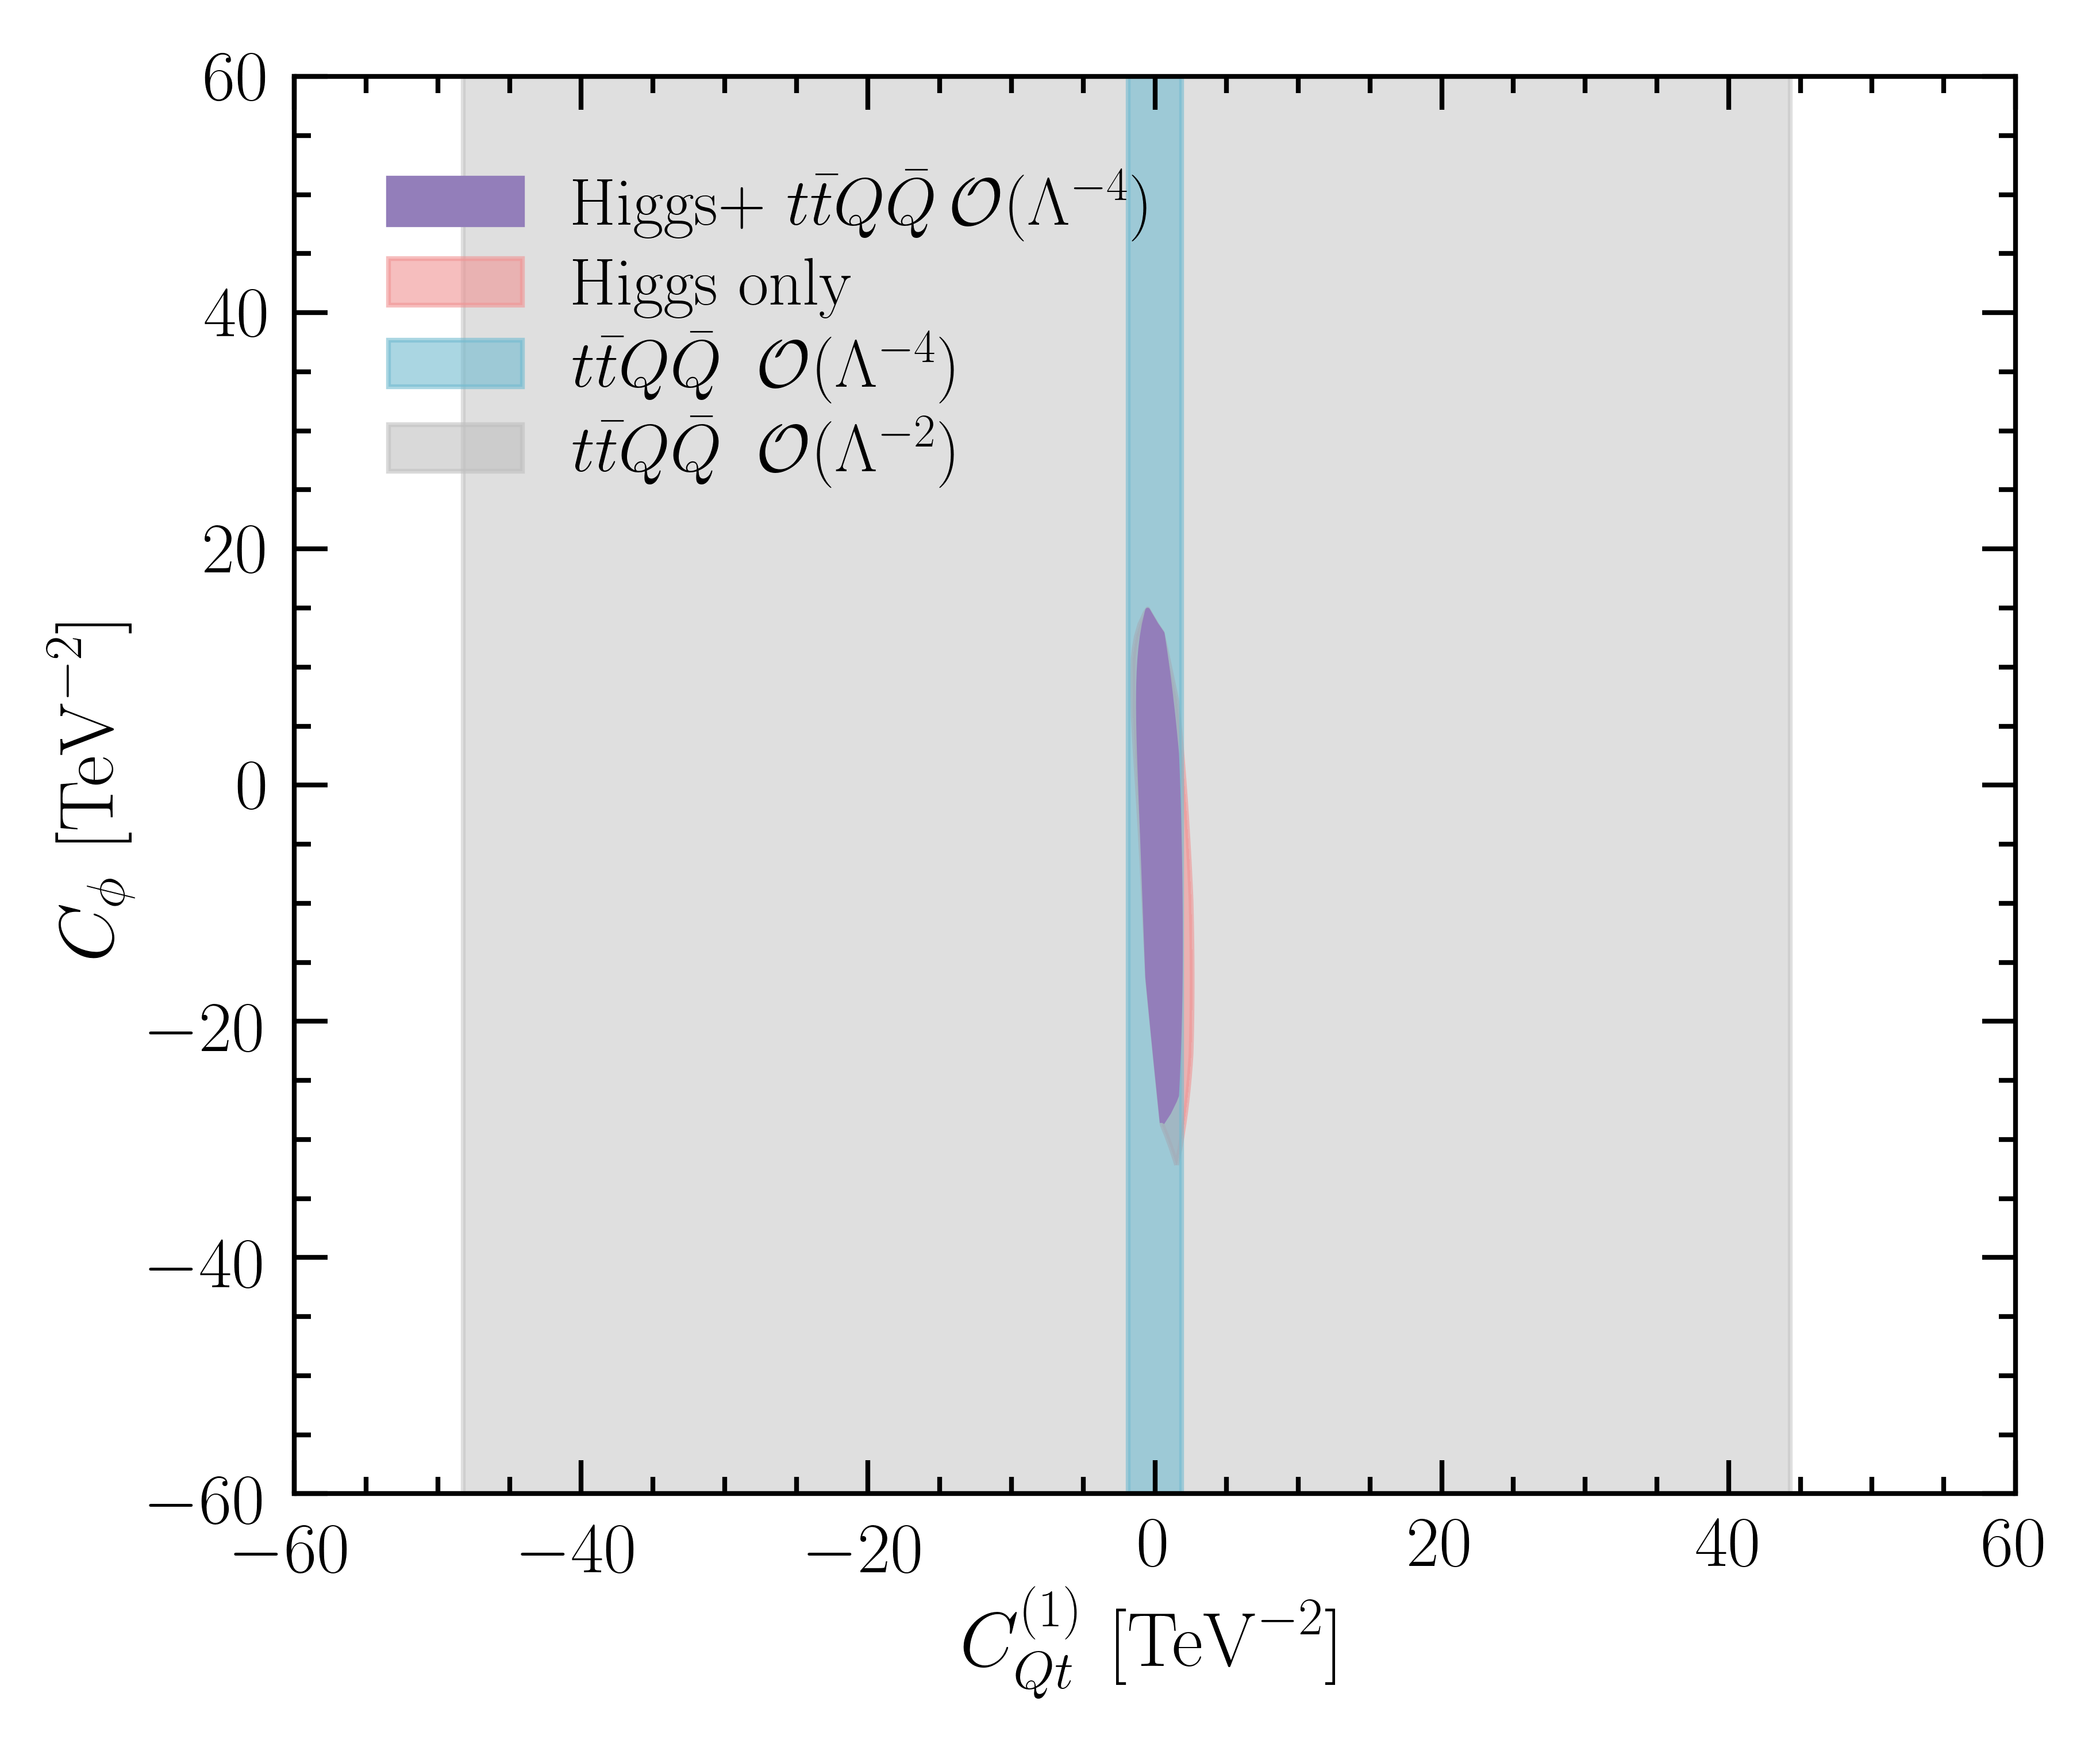

In [20]:
colpastil = ['#f4ecec','#937eba','#72bbd0','#f09494','#91f0a1']
plt.style.use(hep.style.LHCb2)
fig, ax = plt.subplots(1, figsize=(12, 10))
handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white",lw=0, alpha=0),]

labels = []
labels.append(r"ATLAS @ $\sqrt{s}= 13\, \rm{TeV}\,\,\mathcal L =79.8 \,\rm{fb}^{-1}$ ")
cont = plt.contour(cqu1,ch,VecChi2_all(cqu1,ch)
-fminall,[0,5.99],extend='min',zorder= 4,colors=colpastil[1],alpha=1,linewidths=2)
cont = plt.contourf(cqu1,ch,VecChi2_all(cqu1,ch)
-fminall,[0,5.99],extend='min',zorder= 4,colors=colpastil[1],alpha=1)
plt.fill_between([100,101],[100,101],[102,1003],color=colpastil[1],alpha=1,label=r"Higgs+ $t \bar t Q \bar Q\, \mathcal{O}(\Lambda^{-4})$ ")
plt.contourf(cqu1,ch,VecChi2_Higgs(cqu1,ch)
-fminHiggs,[0,5.99],extend='min',zorder= 1,colors=colpastil[3],alpha=0.6,linewidths=2)
plt.contour(cqu1,ch,VecChi2_Higgs(cqu1,ch)
-fminHiggs,[0,5.99],extend='min',zorder= 1,colors=colpastil[3],alpha=0.6,linewidths=2)
plt.fill_between([100,101],[100,101],[102,1003],color=colpastil[3],alpha=0.6,label=r"Higgs only")


mu4topExp = data['Bounds'][operator]
err4topExp= data['Bounds']['delta_%s'%(operator)]

plt.fill_between([100,101],[100,101],[102,1003],color=colpastil[2],alpha=0.6,label=r"$t \bar t Q \bar Q\,\,\, \mathcal{O}(\Lambda^{-4})$")
ax.axvspan(mu4topExp-2*err4topExp, mu4topExp+2*err4topExp, alpha=0.6, color= colpastil[2])

plt.fill_between([100,101],[100,101],[102,1003],color='silver',alpha=0.6,label=r"$t \bar t Q \bar Q\,\,\, \mathcal{O}(\Lambda^{-2})$")
# cqu1
ax.axvspan(-48.23, 44.3, alpha=0.5, color= 'silver', zorder= 0)
# cqu8
#ax.axvspan(-6.15, 20.01, alpha=0.2, color= col[4])
# ctt1
#ax.axvspan(-2.7, 11.5, alpha=0.2, color= col[4])

# cqq1
#ax.axvspan(-5.9, 23.7, alpha=0.2, color= col[4])

# cqq8
# ax.axvspan(-27.8, 44.4, alpha=0.2, color= col[4])



# plt.text(-5.,40,r"$\mu=(1+\delta \sigma)(\frac{1+\delta\Gamma}{1+\delta \Gamma_h})$")
# plt.text(-5.,20,r"(à la Degrassi et al.)")
# plt.text(-1,60,r"ATLAS @ $\sqrt{s}= 13\, \rm{TeV}\,\,\mathcal L =79.8 \,\rm{fb}^{-1}$ ")
# plt.text(-30,50.75,r"$gg \to h \to X \,+ \,4 t$" )#
# plt.text(-3.5,-3,r"$t\bar t t \bar t$",rotation= 90)
plt.xlim(Cqu1[0],Cqu1[-1])
plt.ylim(Ch[0],Ch[-1])
plt.xlabel(r"$%s\,\,[\mathrm{TeV}^{-2}]$"%(oplabel[operator]))
plt.ylabel(r"$C_\phi\,\,[\mathrm{TeV}^{-2}]$") #


ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

ax.legend(loc=2)
plt.gcf().tight_layout()
fig.savefig('CQt1_fit_nonlinear_2.pdf', dpi=300)
plt.show()
